<a href="https://colab.research.google.com/github/araujoroberts/Proyectos/blob/main/Vectorizacion_de_funciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuacion vamos a calcular el sen(x) mediante su serie de taylor
$$
sen(x)=\sum_{k=0}^\infty\frac{(-1)^k}{(2k+1)!}x^{2k+1}=x-\frac{1}{3}x^3+\frac{1}{5}x^5+...
$$

In [17]:
from math import pi , factorial , sqrt , sin
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def f(x,orden):
  sen=[]
  ord=[]
  y=0
 
  for i in range(0,orden,1):
    y+=(-1)**i*x**(1+2*i)/factorial(2*i+1)
    sen.append(y)
    ord.append(i)
  return y


In [26]:
# calculamos sin(45°) con un polinomio de orden 12
f(pi/4,12)

0.7071067811865475

#Error
Calculamos el error relativo porcentual contra el valor real


In [27]:
error=abs(f(pi/4,6)-sin(pi/4.))/sin(pi/4)

print("El error es "+str(error)+"%")

El error es 9.797690960678494e-12%


# Vectorizacion
Ahora vectorizaremos la funcion para poder generar la grafica, esto es:
$$
f(x)\rightarrow f(\vec{x})
$$
$f(x)$ devuelte un valor, pero $f(\vec{x})$ devuelve una lista de ellos, y eso se puede graficar

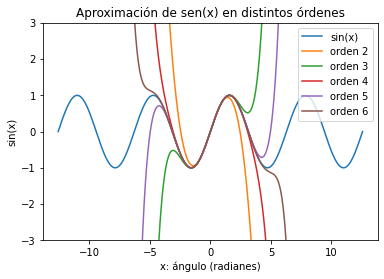

In [21]:
# Para ello utilizaremos la funcion vectorize()
vecf = np.vectorize(f, excluded=['order'])
# Definimos el intervalo
x=np.linspace(-4*pi,4*pi,500)

y=np.sin(x)
#y1=vecf(x,1)
y2=vecf(x,2)
y3=vecf(x,3)
y4=vecf(x,4)
y5=vecf(x,5)
y6=vecf(x,6)
plt.plot(x, y, label='sin(x)')
#plt.plot(x, y1, label='orden 1')
plt.plot(x, y2, label='orden 2')
plt.plot(x, y3, label='orden 3')
plt.plot(x, y4, label='orden 4')
plt.plot(x, y5, label='orden 5')
plt.plot(x, y6, label='orden 6')
plt.title('Aproximación de sen(x) en distintos órdenes')
plt.xlabel('x: ángulo (radianes)')
plt.ylabel('sin(x)')
plt.ylim([-3, 3])
plt.legend()
plt.savefig('plot1.png')

# Sin vectorizar
En lugar de usar la funcion "vectorice()" solo convertimos el intervalo "x=np.linspace()" de tipo lista a tipo array haciendo "x=np.array(np.linspace())"

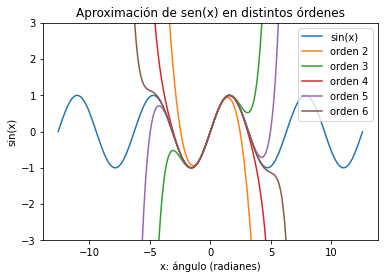

In [42]:
def f(x,orden):
  sen=[]
  ord=[]
  y=0
 
  for i in range(0,orden,1):
    y+=(-1)**i*x**(1+2*i)/factorial(2*i+1)
    sen.append(y)
    ord.append(i)
  return y

x=np.array(np.linspace(-4*pi,4*pi,200))

y=np.sin(x)

y2=f(x,2)
y3=f(x,3)
y4=f(x,4)
y5=f(x,5)
y6=f(x,6)

plt.plot(x, y, label='sin(x)')
plt.plot(x, y2, label='orden 2')
plt.plot(x, y3, label='orden 3')
plt.plot(x, y4, label='orden 4')
plt.plot(x, y5, label='orden 5')
plt.plot(x, y6, label='orden 6')
plt.title('Aproximación de sen(x) en distintos órdenes')
plt.xlabel('x: ángulo (radianes)')
plt.ylabel('sin(x)')
plt.ylim([-3, 3])
plt.legend()
plt.savefig('plot1.png')

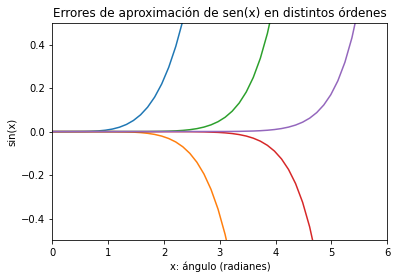

In [44]:
#plt.plot(x, y, label='sin(x)')
plt.plot(x, y-y2, label='err. ord. 2')
plt.plot(x, y-y3, label='err. ord. 3')
plt.plot(x, y-y4, label='err. ord. 4')
plt.plot(x, y-y5, label='err. ord. 5')
plt.plot(x, y-y6, label='err. ord. 6')
plt.title('Errores de aproximación de sen(x) en distintos órdenes')
plt.xlabel('x: ángulo (radianes)')
plt.ylabel('sin(x)')
plt.ylim([-0.5, 0.5])
plt.xlim([0, 6])
#plt.ylim([-5, 5])
#plt.ylim([-10, 10])
#plt.ylim([-20, 20])
#plt.legend()
plt.show()